# EXPLOLATORY DATA ANALYSIS AND DATA MANIPULATION

5 - 20 min Reading

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df_train = pd.read_csv('Train_BigMart_sales.csv')

In [147]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Get to Know Your Data #1

The purpose of this project is to predict the sales of each item in each store.

If we look at the available features in the table. these features are owned by one of the two existing entities. These entities are items and stores. The following are the features of each entity:

1. Item: Item Identifier, Item Weight, Item Fat Content, Item Visibility, Item Type, Item MRP
2. Store: Outlet Identifier, Outlet Establishment Year, Outlet_Size, Outlet Location Type, Outlet Type, Item Outlet Sales

Then between these entities have a relationship, the relationship is many-to-many. Where each store has many items, and each item is in several stores.

Let's analyze more about the data we have

In [148]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [149]:
# Seperate feature belong to

item_feature = df_train.columns[:6]
store_feature = df_train.columns[6:]

In [150]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [151]:
# Just to make sure, see every single item have sama value of its feature 

# the weight of an item must be the same, so we can fill in the missing value based on the type of item

df_train[df_train['Item_Identifier']=='FDA15'][['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Item_Outlet_Sales']]

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales
0,9.3,0.016047,Dairy,249.8092,OUT049,3735.1380
831,9.3,0.016055,Dairy,250.2092,OUT045,5976.2208
2599,9.3,0.016019,Dairy,248.5092,OUT035,6474.2392
2643,9.3,0.016088,Dairy,249.6092,OUT018,5976.2208
4874,9.3,0.026818,Dairy,248.9092,OUT010,498.0184
5413,9.3,0.016009,Dairy,250.6092,OUT013,6474.2392
6696,NaN,0.015945,Dairy,249.5092,OUT027,6474.2392
7543,9.3,0.016113,Dairy,248.8092,OUT017,5976.2208


In [152]:
# Fill Missing Value of Item Weight base on Item Identifier

weight_item = df_train.groupby('Item_Identifier')['Item_Weight'].mean()

idx_miss = df_train[df_train['Item_Weight'].isnull()].index

for i in idx_miss :
    df_train.loc[i, 'Item_Weight'] = weight_item[df_train.loc[i, 'Item_Identifier']]

In [153]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [154]:
df_train[df_train['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [155]:
print(len(df_train[df_train['Item_Identifier']=='FDN52']))
print(len(df_train[df_train['Item_Identifier']=='FDK57']))
print(len(df_train[df_train['Item_Identifier']=='FDE52']))
print(len(df_train[df_train['Item_Identifier']=='FDQ60']))

1
1
1
1


Note : Items that still missing is unique, so the reason it's still missing because it have no reference.

In [156]:
df_train.nunique()

Item_Identifier              1559
Item_Weight                   497
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [157]:
df_train[['Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size']].sort_values(by='Outlet_Identifier').tail()

,Outlet_Identifier,Outlet_Location_Type,Outlet_Size
5079,OUT049,Tier 1,Medium
5073,OUT049,Tier 1,Medium
5068,OUT049,Tier 1,Medium
4899,OUT049,Tier 1,Medium
4261,OUT049,Tier 1,Medium


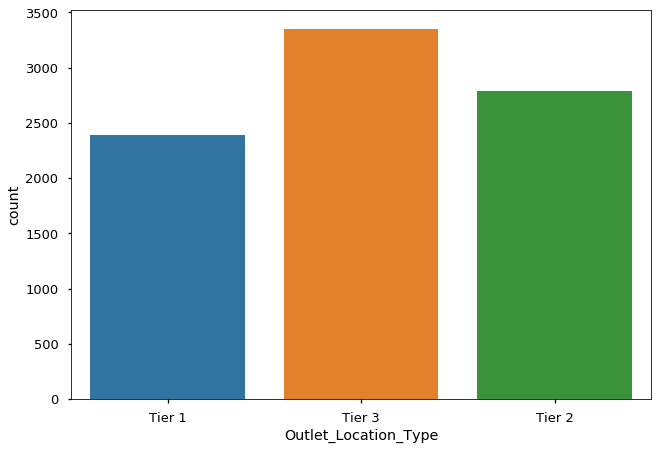

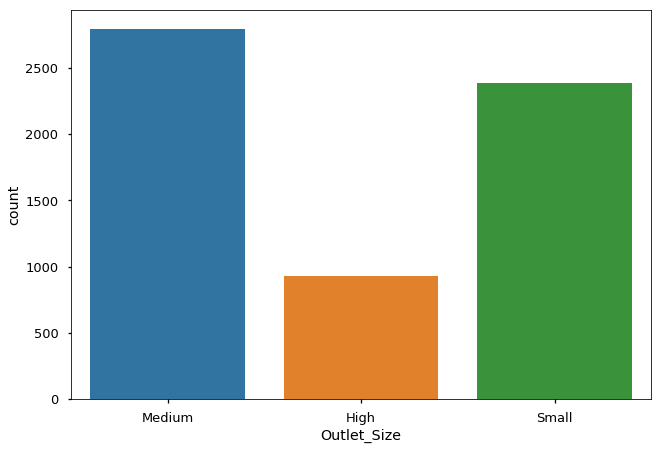

In [158]:
sns.countplot(df_train.Outlet_Location_Type)
plt.show()

sns.countplot(df_train.Outlet_Size)
plt.show()

In [159]:
dg = df_train.groupby('Outlet_Location_Type')['Outlet_Size'].nunique().rename('Unique')

pd.crosstab(df_train['Outlet_Location_Type'], df_train['Outlet_Size']).join(dg)

,High,Medium,Small,Unique
Outlet_Location_Type,,,,
Tier 1,0,930,1458,2
Tier 2,0,0,930,1
Tier 3,932,1863,0,2


## Got to Know Your Data #2

We can say that Tier 1, Tier 2 and Tier 3 location types are small to large cities. because Tier 3 has a large, medium type of shop. more in the medium and some large. while Tier 1 is a small town because more stores are small in size compared to medium, and do not have large stores. so there is a kind of relationship between location and store size. so we will drop one of these features. and I will choose delete size because it has a lot of missing values.

In [160]:
df_train.drop('Outlet_Size', axis=1, inplace=True)

In [161]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8519 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.5+ KB


In [162]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.646098,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## What I Think #1
I think, we must transform the feature of 'Outlet Establishment Year' by 'Has Been Standing For'. because this value is easier to interpret, so it will not 'hurt' the model we will make.
I assume that now is 2009

In [163]:
df_train['Has_Been_Standing_For'] = 2009 - df_train['Outlet_Establishment_Year']

In [164]:
df_train.drop('Outlet_Establishment_Year', axis=1, inplace=True)

In [165]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Has_Been_Standing_For
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,2181.288914,11.168133
std,4.646098,0.051598,62.275067,1706.499616,8.371760
min,4.555000,0.000000,31.290000,33.290000,0.000000
25%,8.785000,0.026989,93.826500,834.247400,5.000000
50%,12.650000,0.053931,143.012800,1794.331000,10.000000
75%,16.850000,0.094585,185.643700,3101.296400,22.000000
max,21.350000,0.328391,266.888400,13086.964800,24.000000


## What I think #2
I will create feature :
1. Average sales of each store for all items
2. Average sales of each item for all store
3. Max Item Visibility for all item in store
4. Min Item Visibility for all item in store
5. Mean Item Visibility for all item in store
6. Minimum sales of each store for all items 
7. Maximum sales of each store for all items
8. Minimum sales of each item in store
9. Maximum sales of each item in store
10. Range MRP of Items

In [166]:
df1 = df_train.groupby('Item_Identifier')['Item_Outlet_Sales'].agg(['mean', 'min', 'max'])
df1.columns = ['Mean_sales_of_Item', 'Minn_sales_of_Item', 'Max_sales_of_Item']

df2 = df_train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].agg(['mean', 'min', 'max'])
df2.columns = ['Mean_sales_of_store', 'Min_sales_of_store', 'Max_sales_of_store']

df3 = df_train.groupby('Item_Identifier')['Item_Visibility'].agg(['mean', 'min', 'max'])
df3.columns = ['Mean_visibiliy', 'Min_Visibility', 'Max_Visibility']

df4 = df_train.groupby('Item_Identifier')['Item_MRP'].agg('max') - df_train.groupby('Item_Identifier')['Item_MRP'].agg('min')

In [167]:
df_train = df_train.join(df1, on='Item_Identifier').join(df2, on='Outlet_Identifier').join(df3, on='Item_Identifier').join(df4, on='Item_Identifier', rsuffix='_range')

In [168]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Has_Been_Standing_For,Mean_sales_of_Item,Minn_sales_of_Item,Max_sales_of_Item,Mean_sales_of_store,Min_sales_of_store,Max_sales_of_store,Mean_visibiliy,Min_Visibility,Max_Visibility,Item_MRP_range
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,2181.288914,11.168133,2181.288914,650.674474,3880.483788,2181.288914,108.587269,8358.891833,0.066132,0.043633,0.093389,2.860812
std,4.646098,0.051598,62.275067,1706.499616,8.371760,1115.166402,695.830926,2035.984017,837.472676,55.815936,3062.879070,0.044710,0.045567,0.068194,0.760857
min,4.555000,0.000000,31.290000,33.290000,0.000000,110.966667,33.290000,120.509800,339.351662,33.290000,1482.070800,0.003981,0.000000,0.005562,0.000000
25%,8.785000,0.026989,93.826500,834.247400,5.000000,1326.273600,185.092400,2297.010000,2192.384798,73.238000,7646.047200,0.030751,0.000000,0.040226,2.400000
50%,12.650000,0.053931,143.012800,1794.331000,10.000000,2050.664000,387.495600,3579.340800,2298.995256,101.867400,8994.958000,0.054991,0.031867,0.074518,3.000000
75%,16.850000,0.094585,185.643700,3101.296400,22.000000,2936.178000,822.263000,5229.193200,2348.354635,113.851800,9779.936200,0.093743,0.071064,0.132630,3.400000
max,21.350000,0.328391,266.888400,13086.964800,24.000000,6035.310550,5635.331200,13086.964800,3694.038558,241.685400,13086.964800,0.223469,0.191501,0.328391,4.000000


In [169]:
"""I have finished doing feature creation, now I will delete the entity identifier 
because it is no longer needed and is irrelevant to the target variable"""

df_train.drop(['Item_Identifier',  'Outlet_Identifier'], axis=1, inplace=True)

In [170]:
feat = df_train.columns
cat = []
num = []
for var in feat :
    if df_train.dtypes[var] == 'object' :
        cat.append(var)
    else :
        num.append(var)

In [171]:
print('Category : ')
print(cat)
print('Numeric : ')
print(num)

Category : 
['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']
Numeric : 
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Has_Been_Standing_For', 'Mean_sales_of_Item', 'Minn_sales_of_Item', 'Max_sales_of_Item', 'Mean_sales_of_store', 'Min_sales_of_store', 'Max_sales_of_store', 'Mean_visibiliy', 'Min_Visibility', 'Max_Visibility', 'Item_MRP_range']


C:\Users\Data Scientist\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


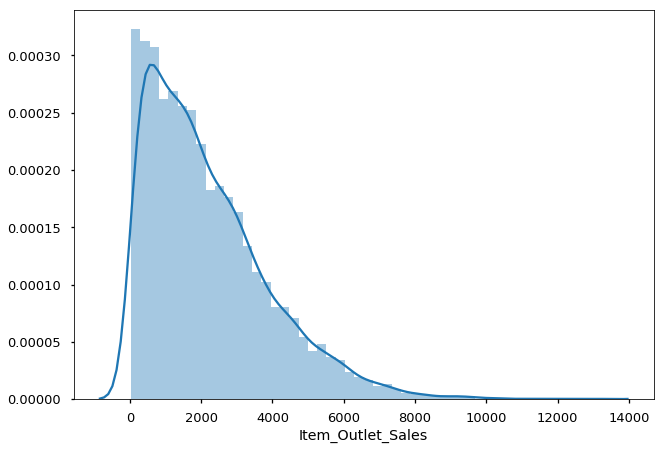

In [172]:
plt.style.use('seaborn-talk')
sns.distplot(df_train.Item_Outlet_Sales, norm_hist=True)
plt.show()

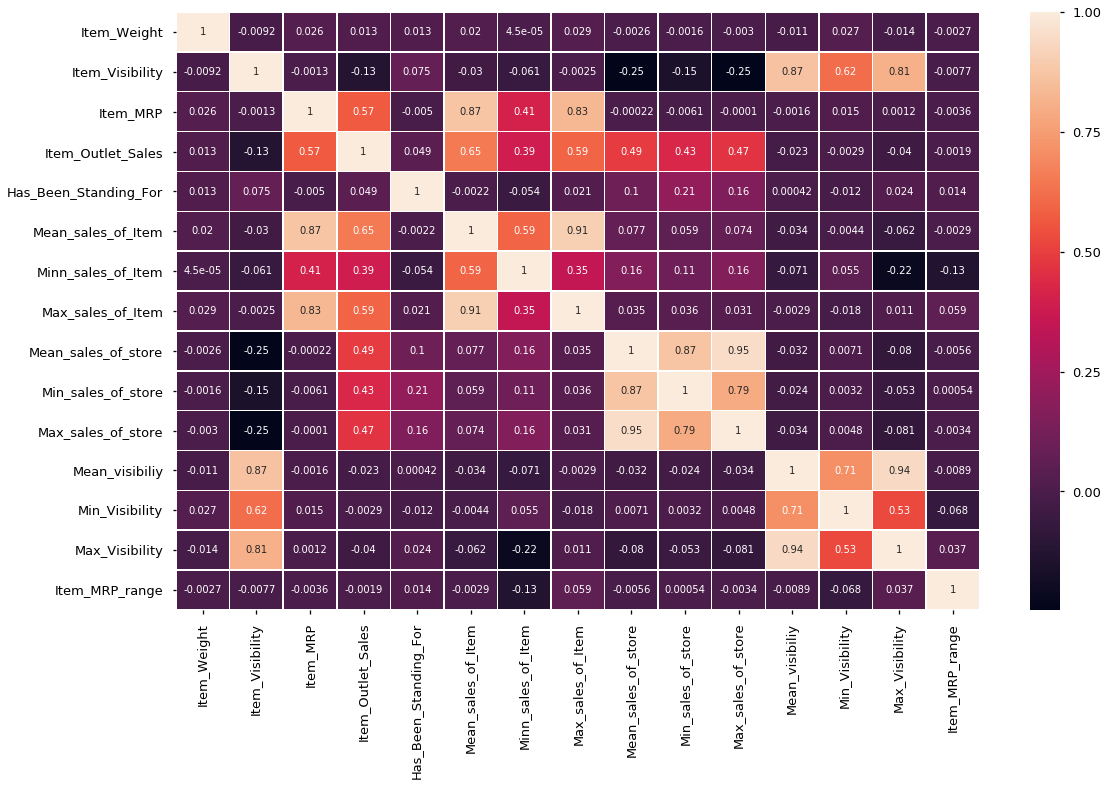

In [173]:
plt.figure(figsize=(18, 11))
sns.heatmap(df_train.corr(), annot=True, linewidth=0.5)
plt.show()

## What I Think #3

Soo Many HomeWork!!, need to drop some redundat feature

In [174]:
df_train.drop(['Max_Visibility', 'Mean_visibiliy', 'Mean_sales_of_store', 'Mean_sales_of_Item', 'Item_MRP', 'Max_sales_of_store'], axis=1, inplace=True)

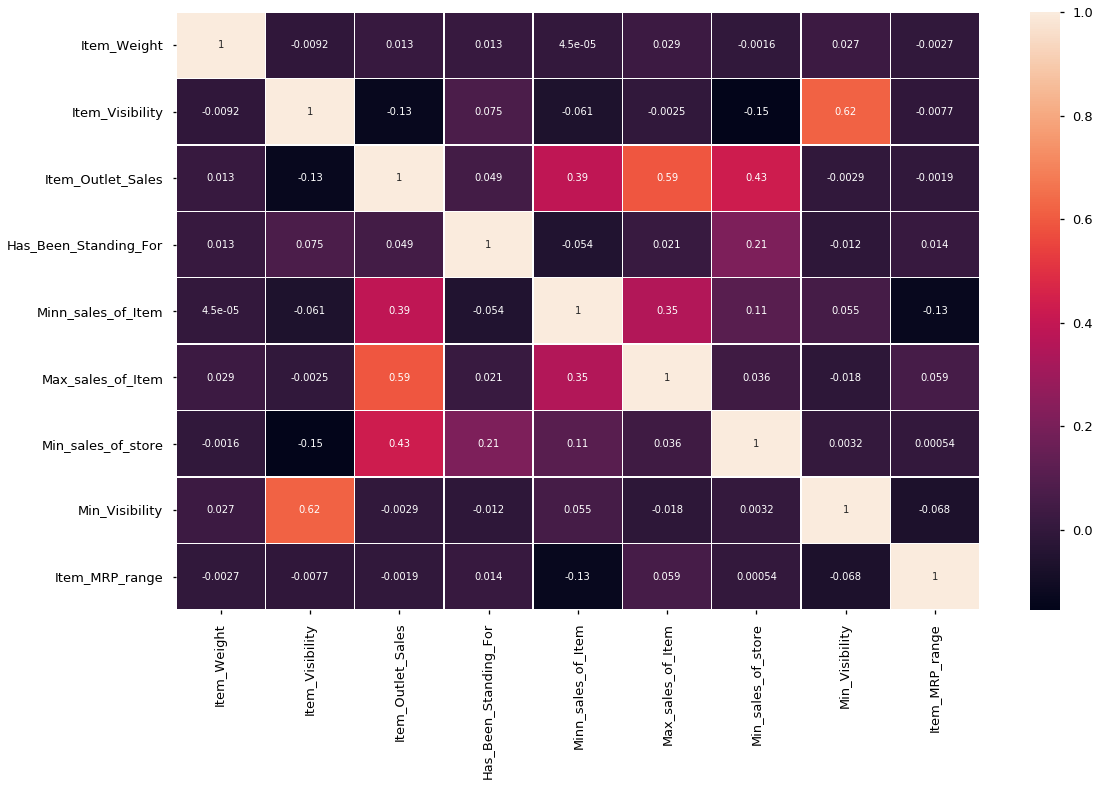

In [178]:
plt.figure(figsize=(18, 11))
sns.heatmap(df_train.corr(), annot=True, linewidth=0.5)
plt.show()

C:\Users\Data Scientist\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


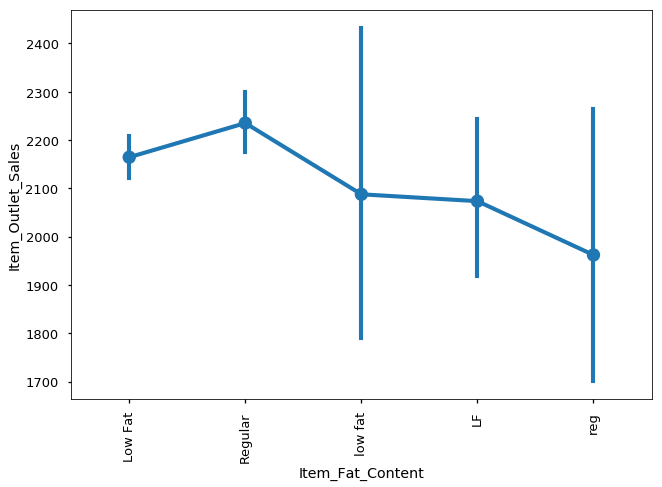

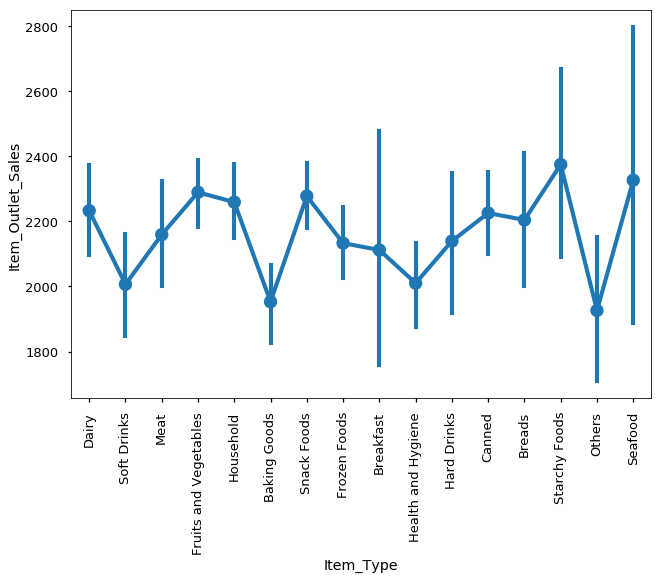

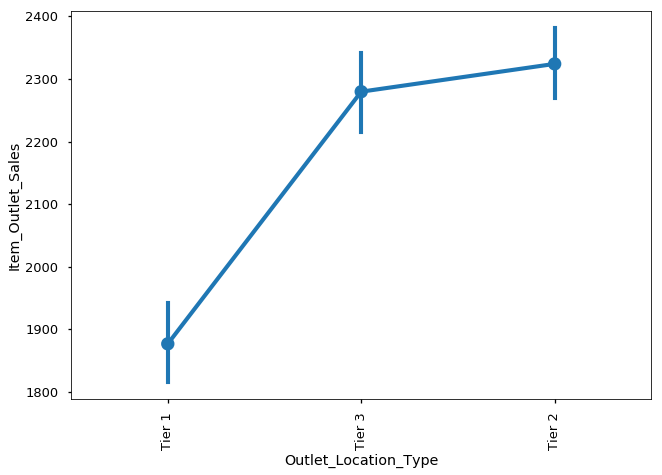

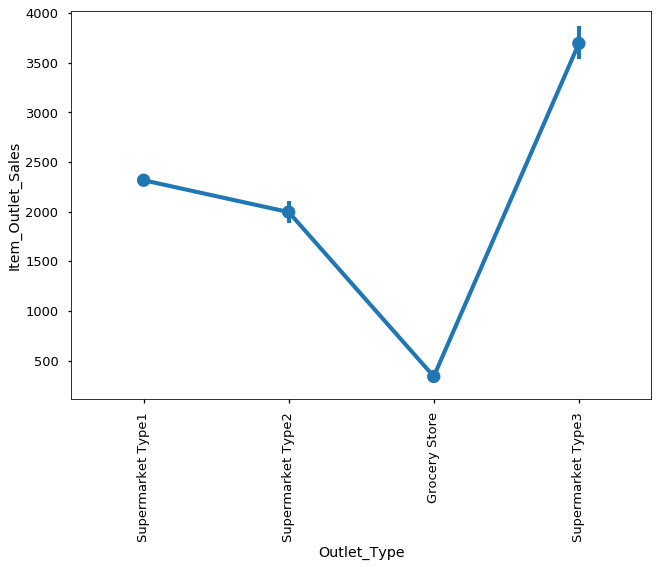

In [186]:
for var in cat :
    sns.pointplot(x=var, y='Item_Outlet_Sales', data=df_train)
    plt.xticks(rotation=90)
    plt.show()

C:\Users\Data Scientist\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


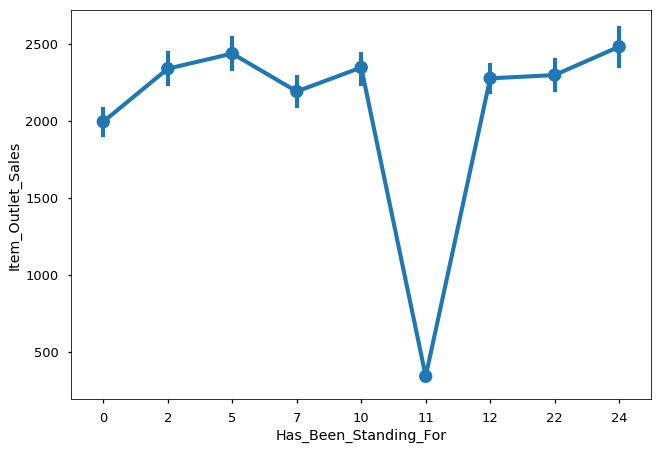

In [216]:
sns.pointplot('Has_Been_Standing_For', y='Item_Outlet_Sales',data=df_train)
plt.show()

## What I Think #4
1. Fat content items do not have good information to predict, but wait for something to be wrong in naming the value, something is double. let's handle it after this.
2. Item type do not have good information to predict too, we will try to manipulation the feature later
3. Outlet Location Type have good information to predict, but Tier 3 and Tier 2 is not different, its should be 1 cluster.
4. Outlet Type have very good information to predict.

In [192]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace(['LF','reg','low fat'], ['Low Fat', 'Regular', 'Low Fat'])

C:\Users\Data Scientist\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


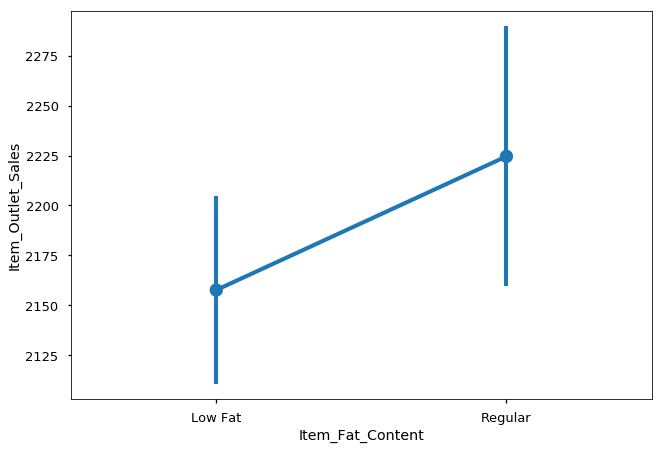

In [195]:
sns.pointplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df_train)
plt.show()

Note : Item Fat Content have very small predict power, because the boundary is highly overlap and mean difference is really low relative to std

In [188]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [189]:
df_train['Item_Type'] = df_train['Item_Type'].replace(['Snack Foods', 'Frozen Foods', 'Meat', 'Breads', 'Starchy Foods',
                                                      'Breakfast', 'Seafood'], ['Snack', 'Foods', 'Foods', 'Foods', 'Foods', 'Foods', 'Foods'])

C:\Users\Data Scientist\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


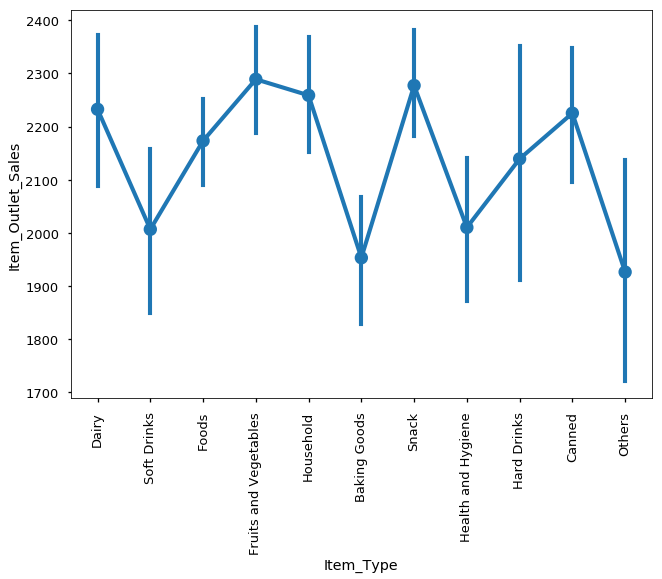

In [197]:
sns.pointplot(x='Item_Type', y='Item_Outlet_Sales', data=df_train)
plt.xticks(rotation=90)
plt.show()

STILL MESSY, NO PATTERN!

In [198]:
df_train['Item_Type'] = df_train['Item_Type'].replace(['Foods', 'Dairy', 'Baking Goods', 'Snack', 'Hard Drinks', 'Canned', 'Soft Drinks'], 
                                                     ['Foods and Drinks', 'Foods and Drinks', 'Foods and Drinks', 
                                                     'Foods and Drinks', 'Foods and Drinks', 'Foods and Drinks', 'Foods and Drinks'])

C:\Users\Data Scientist\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


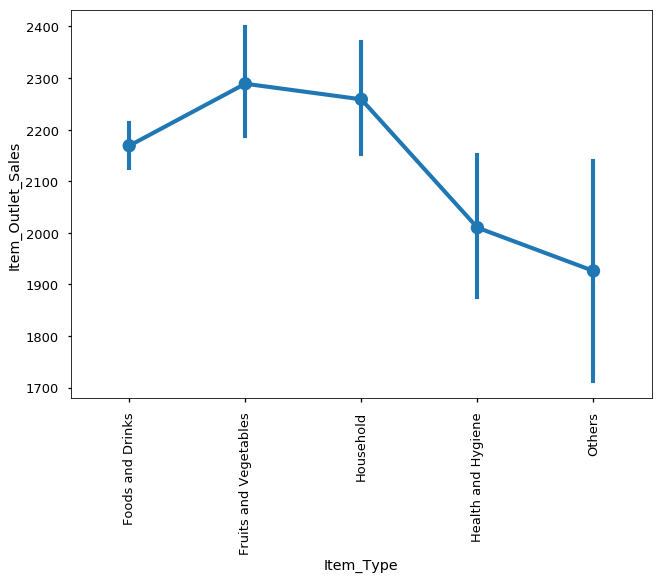

In [199]:
sns.pointplot(x='Item_Type', y='Item_Outlet_Sales', data=df_train)
plt.xticks(rotation=90)
plt.show()

STILL BAD, Ok this is bad feature

In [200]:
df_train.drop(['Item_Type', 'Item_Fat_Content'], axis=1, inplace=True)

In [202]:
"""Combine Tier 2 and Tier 3 becuase its have same charcteristic base on Sales"""

df_train['Outlet_Location_Type'] = df_train['Outlet_Location_Type'].replace(['Tier 3', 'Tier 2'], ['Tier 2|3', 'Tier 2|3'])

C:\Users\Data Scientist\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


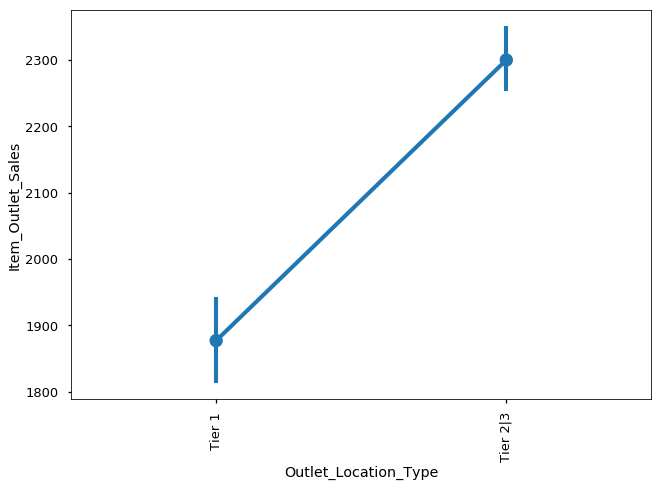

In [203]:
sns.pointplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df_train)
plt.xticks(rotation=90)
plt.show()

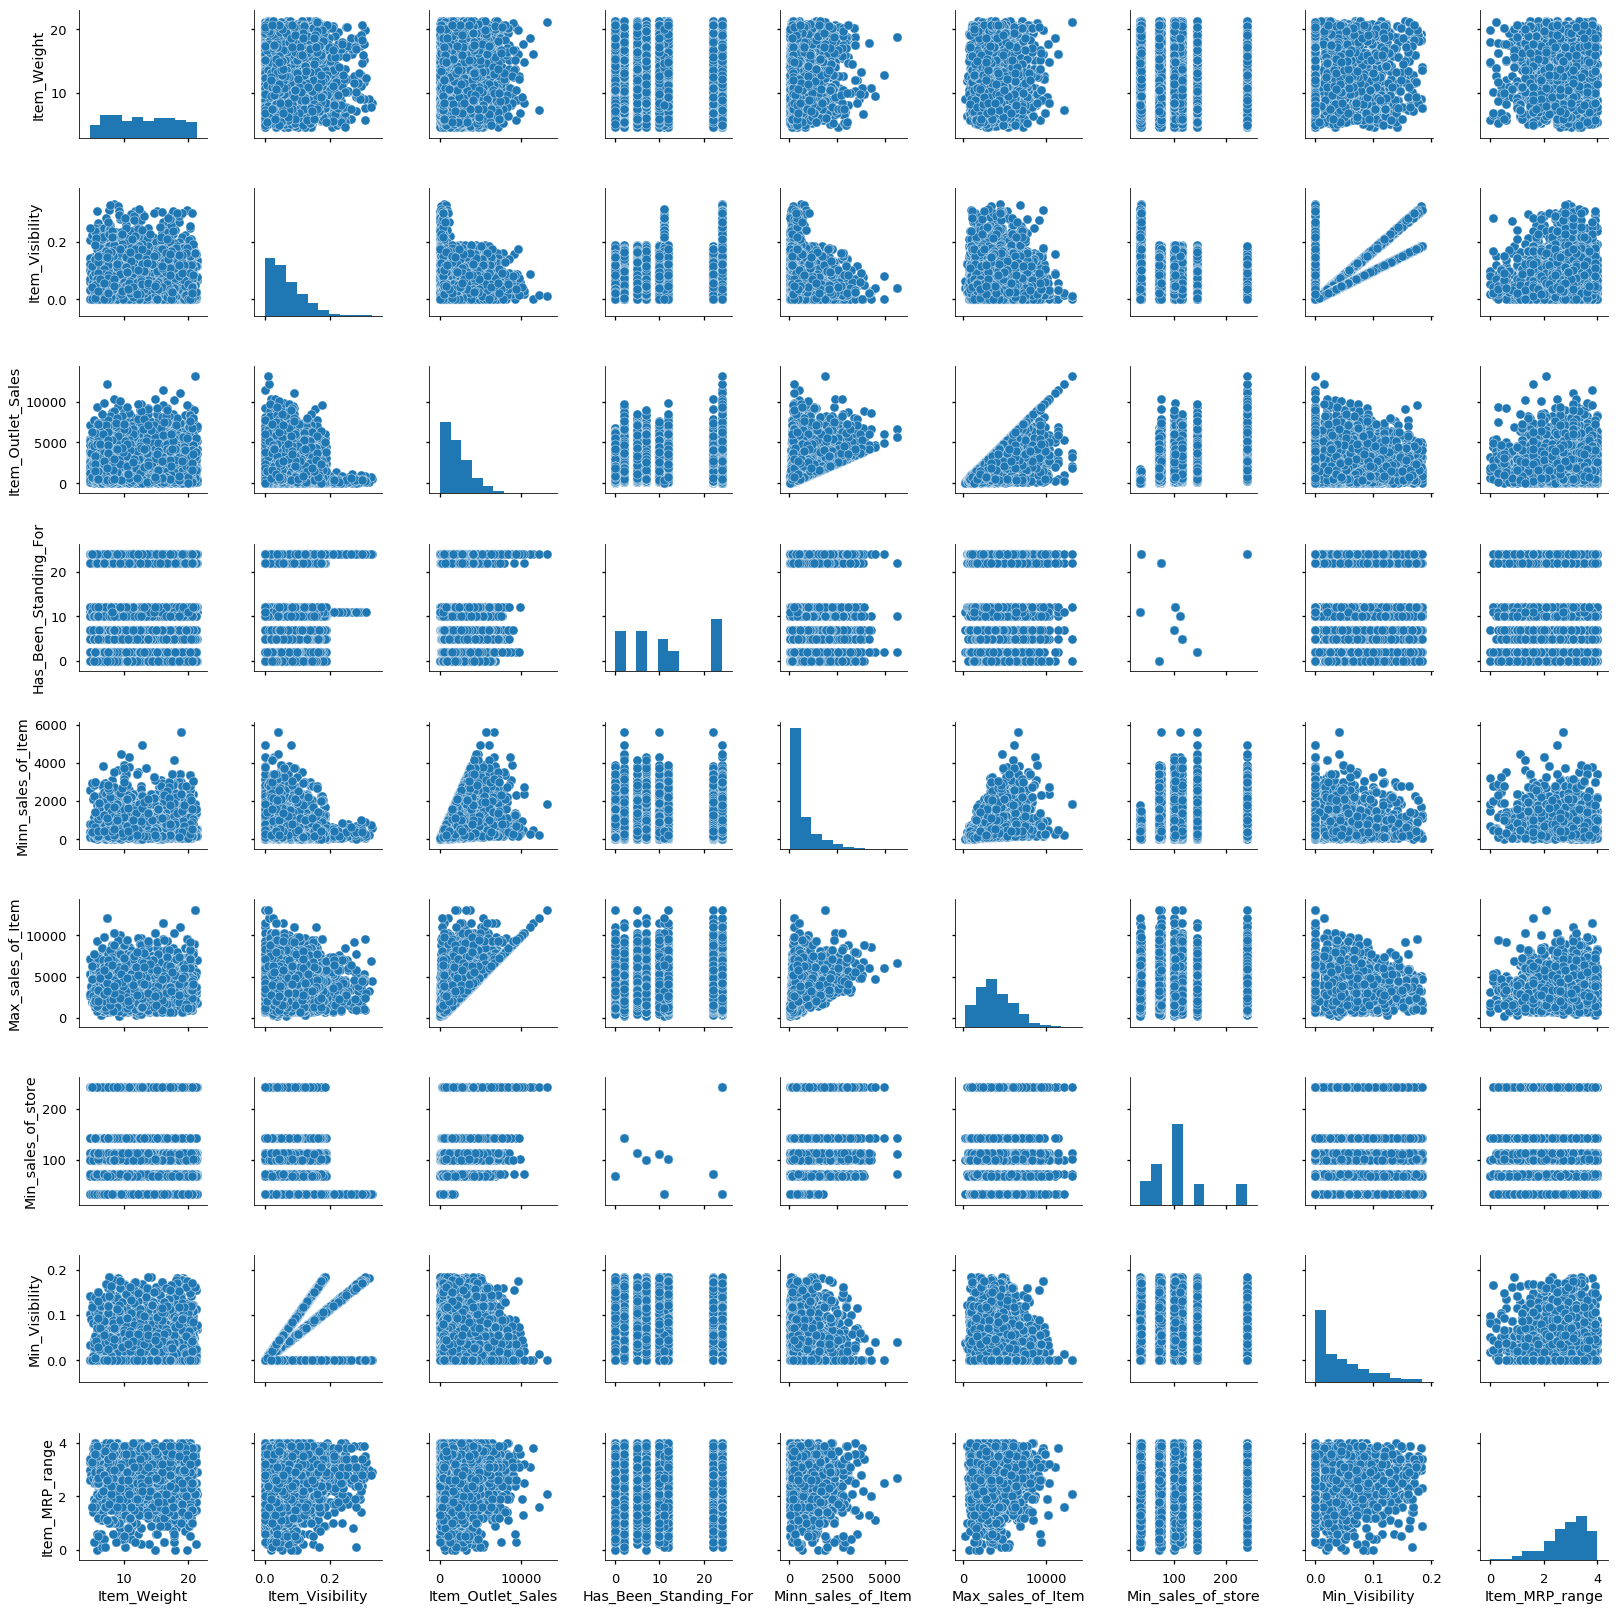

In [214]:
plt.figure(figsize=(20, 15))
sns.pairplot(df_train.dropna())
plt.show()

So, what we have done :
 1. Explolatory Data Analysis
 2. Feature Engeenering (Feature Creation and Selection) which is only based on business understanding and statistics
 
what we haven't done yet (soon in part 2) :
1. Feature Selection Based on Machine Learning
2. Data Preparation
3. Modeling

In [217]:
df_train.to_csv('big_mart_sales_manipulation.csv')